<a href="https://colab.research.google.com/github/Kuldeep995/Machine_Learning/blob/master/1801093endsemMLExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question** **3**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading Pavia University Dataset**

In [ ]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import pandas as pd
import numpy as np

S=sio.loadmat('/content/drive/My Drive/ML_data/PaviaU.mat')
sample = S['paviaU']
print(sample.shape)
sample = sample.reshape((sample.shape[0]*sample.shape[1]), sample.shape[2])
print(sample.shape)

T=sio.loadmat('/content/drive/My Drive/ML_data/PaviaU_gt.mat')
output = T['paviaU_gt']
print(output.shape)
output = output.reshape((output.shape[0]*output.shape[1]))
print(output.shape)

(610, 340, 103)
(207400, 103)
(610, 340)
(207400,)


**Training using MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=207400, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(sample, output, stratify=output,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

0.7943105110896818

**Training using MLP for different learning rate**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
X=sample
y=output
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)

learning_rate=[0.001,0.003,0.005,0.1,0.03,0.05]
accuracy=[]

for lr in learning_rate:
  clf = MLPClassifier(learning_rate_init=lr,random_state=1, max_iter=200).fit(X_train, y_train)
  

  
  accuracy.append(clf.score(X_test, y_test))

print(accuracy)

[0.7943105110896818, 0.7937126325940213, 0.7937512054001928, 0.793731918997107, 0.793731918997107, 0.7937512054001928]


**Taking learning rate = 0.001 as that produces highest accuracy**

**Applying PCA**

In [ ]:
data = pd.DataFrame(data = sample) 

from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
scalar.fit(data.dropna()) 
scaled_data = scalar.transform(data.dropna()) 
  
from sklearn.decomposition import PCA 

pca = PCA(n_components = data.shape[1]) 
p=pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
x_pca.shape

(207400, 103)

**Generating variance vs no of components plot to select no of features**

Text(0, 0.5, 'cumulative explained variance')

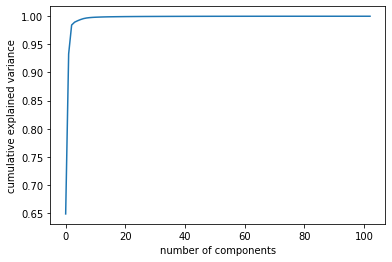

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(p.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**Selecting 10 features as the plot takes sharp turn there **

In [ ]:
_pca = PCA(n_components = 10) 
_pca.fit(scaled_data) 
final = _pca.transform(scaled_data) 

**Applying MLP using 10 features**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X=final
y=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(hidden_layer_sizes=105,random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

print("accuracy",)
clf.score(X_test, y_test)

accuracy


0.8419093539054966

We notice that it produces good accuracy even with less features

**Running code by varying no of features**

In [ ]:

_pca = PCA(n_components = 20 ) 
_pca.fit(scaled_data) 
final = _pca.transform(scaled_data) 
X=final
y=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(hidden_layer_sizes=105,random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])

print("accuracy : ")
clf.score(X_test, y_test)



accuracy : 


0.8703567984570878

In [ ]:

_pca = PCA(n_components = 23 ) 
_pca.fit(scaled_data) 
final = _pca.transform(scaled_data) 
X=final
y=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(hidden_layer_sizes=105,random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])

print("accuracy : ")
clf.score(X_test, y_test)



accuracy : 


0.8695660559305689

accuracy for 103 features is = 0.79
accuracy for 10 features is = 0.84
# **for other two features its taking too much time so could not run it in time, took more than 15 mins to run just for 1 feature**